


# Importing necessary libraries





In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTEENN
import tensorflow as tf
from scipy.stats import norm 
from sklearn.metrics import confusion_matrix
from tensorflow import keras 
from scipy import optimize
from sklearn import metrics


# Data description and preparation

In [ ]:
df_diab=pd.read_csv("diabetic_data.csv")


In [ ]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

As we can see that in the data columns there are some identification columns, some numerical columns, some categorical (free-text) columns.

In [ ]:
df_ids=pd.read_csv("IDs_mapping.csv")
df_ids.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [ ]:
df_diab.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


As it can be seen that there are many missing values "?" in the data set so it has to be cleaned and replaced

encounter_id and patient_nbr are of no use so we can remove those.

In [ ]:
df_diab.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

In [ ]:
df_diab.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#Checking for unique columns
uniq_column=[]
for i in df_diab.columns:
    if len(df_diab[i].value_counts())==1:
        uniq_column.append(i)
for i in uniq_column:
    df_diab.drop([i],axis=1,inplace=True)    
print(uniq_column)

['examide', 'citoglipton']


In [ ]:
print('Total columns in the dataset are',len(df_diab.columns))

Total columns in the dataset are 46


To check all these columns we need to check for 10 coulmns art a time as pandas does not allow more that 10 columns to be displayed at once.

In [ ]:
df_diab[list(df_diab.columns)[:10]].head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?


In [ ]:
df_diab[list(df_diab.columns)[10:20]].head()

,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
0,41,0,1,0,0,0,250.83,?,?,1
1,59,0,18,0,0,0,276,250.01,255,9
2,11,5,13,2,0,1,648,250,V27,6
3,44,1,16,0,0,0,8,250.43,403,7
4,51,0,8,0,0,0,197,157,250,5


In [ ]:
df_diab[list(df_diab.columns)[20:30]].head()

,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide
0,None,None,No,No,No,No,No,No,No,No
1,None,None,No,No,No,No,No,No,No,No
2,None,None,No,No,No,No,No,No,Steady,No
3,None,None,No,No,No,No,No,No,No,No
4,None,None,No,No,No,No,No,No,Steady,No


In [ ]:
df_diab[list(df_diab.columns)[30:40]].head()

,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin
0,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,Up,No,No
2,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,Up,No,No
4,No,No,No,No,No,No,No,Steady,No,No


In [ ]:
df_diab[list(df_diab.columns)[40:]].head()

,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,No,No,No,No,No,NO
1,No,No,No,Ch,Yes,>30
2,No,No,No,No,Yes,NO
3,No,No,No,Ch,Yes,NO
4,No,No,No,Ch,Yes,NO


As it can be seen that there are a lot of no numerical values in the dataset that is categorical values, it needs to be handled too that will be done as we move forward.

In [ ]:
def check_label(x):
    if x == '>30' or x =='<30':
        return 'Yes'
    else:
        return 'No'
    
df_diab['tar'] =df_diab['readmitted'].apply(lambda x: check_label(x))

#dropping readmitted column
df_diab.drop(['readmitted'],axis=1,inplace=True)

#df_diab['objective'] = df_diab['objective'].astype(str).astype(int)
#df_diab['objective']=(df_diab['readmitted']=='<30').astype('int')
#df_diab

In [ ]:
df_diab2=df_diab.copy()


In [ ]:
df_diab['objective'] = df_diab['tar'].map({'Yes': 1, 'No': 0})
df_diab.drop(['tar'],axis=1,inplace=True)
df_diab

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,objective
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,1
101762,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,0


# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Distribution of Readmission')

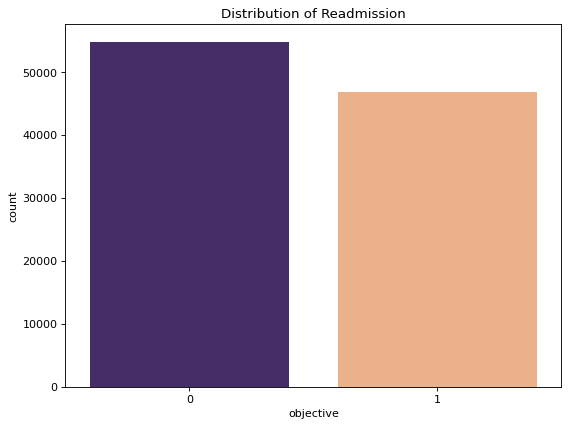

In [ ]:
figure(figsize=(8, 6), dpi=80)
sns.countplot(df_diab['objective'],palette=['#432371',"#FAAE7B"]).\
set_title('Distribution of Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

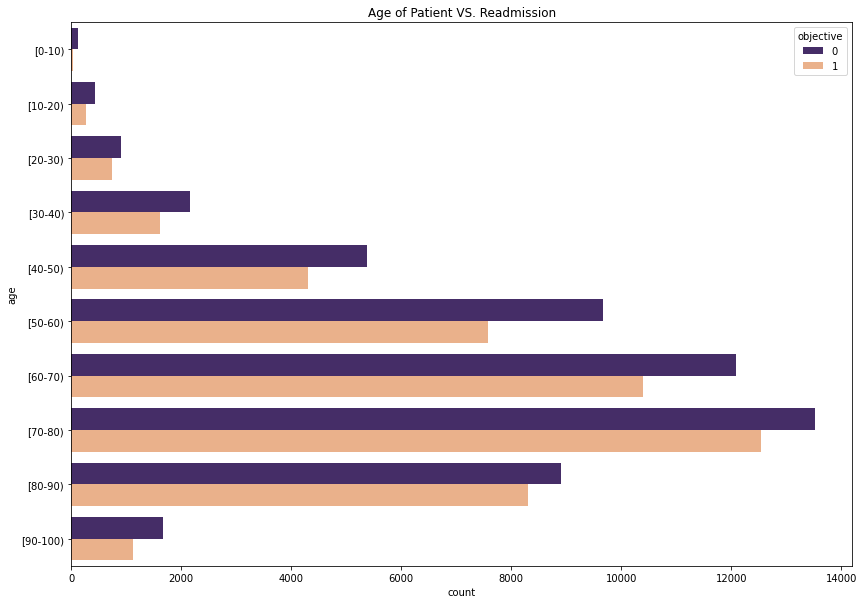

In [ ]:
fig = plt.figure(figsize=(14,10))
sns.countplot(y= df_diab['age'], hue = df_diab['objective'],\
              palette=['#432371',"#FAAE7B"]).\
              set_title('Age of Patient VS. Readmission')

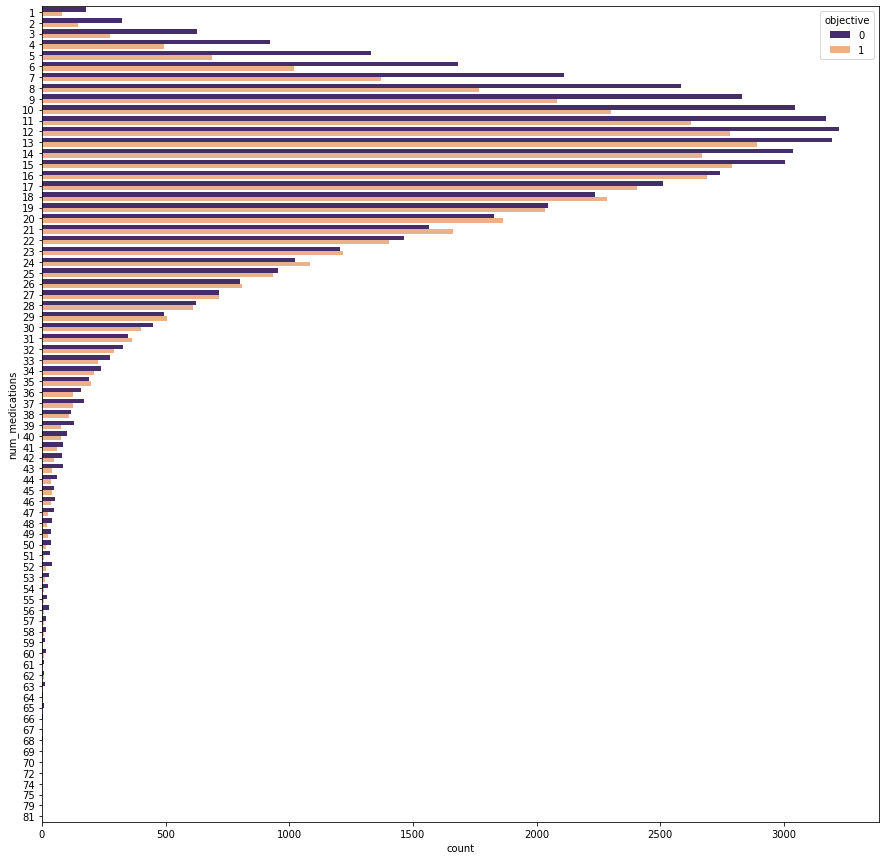

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.countplot(y = df_diab['num_medications'], hue = df_diab['objective']\
              ,palette=['#432371',"#FAAE7B"])
#fig = plt.figure(figsize=(8,8))
#sns.barplot(x = df_diab['objective'], y = df_diab['num_medications'])\
#.set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'Number of Lab procedures conducted VS. Readmission')

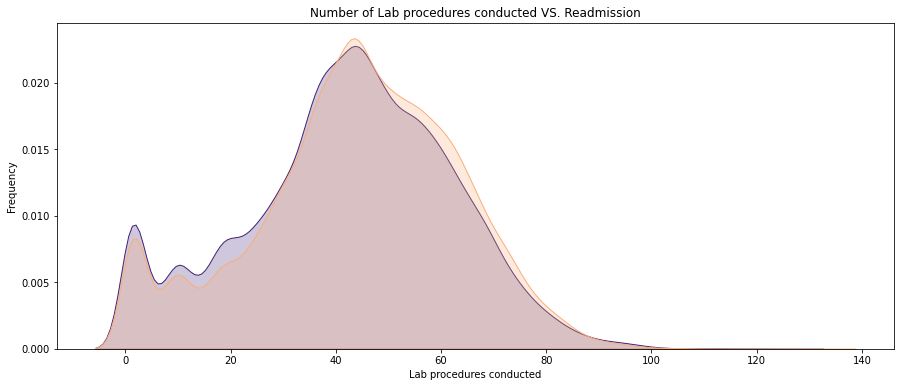

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df_diab.loc[(df_diab['objective'] == 0),'num_lab_procedures'] , \
               color='#432371',shade=True,label='Not readmitted')
ax=sns.kdeplot(df_diab.loc[(df_diab['objective'] == 1),'num_lab_procedures'] ,\
               color='#FAAE7B',shade=True, label='readmitted')
ax.set(xlabel='Lab procedures conducted', ylabel='Frequency')
plt.title('Number of Lab procedures conducted VS. Readmission')

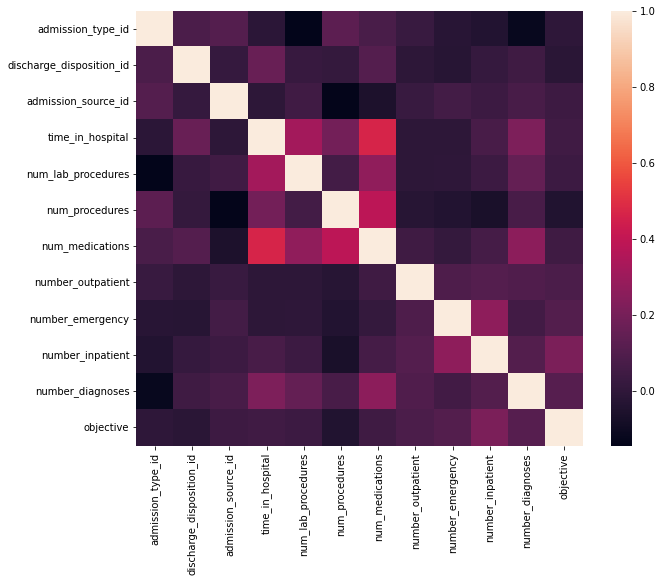

In [ ]:
figure(figsize=(10, 8))
sns.heatmap(df_diab.corr())

Text(0, 0.5, 'num_medications')

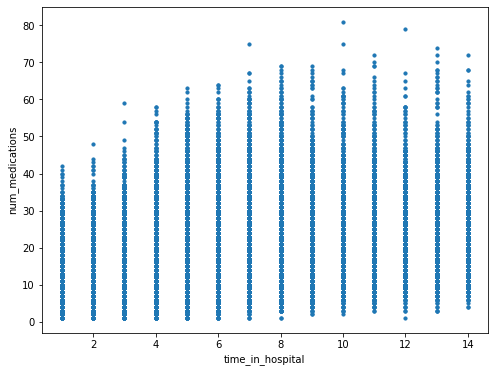

In [ ]:
figure(figsize=(8, 6))
plt.scatter(df_diab['time_in_hospital'],df_diab['num_medications'],marker='o',s=10)
plt.xlabel('time_in_hospital',size=10)
plt.ylabel('num_medications',size=10)


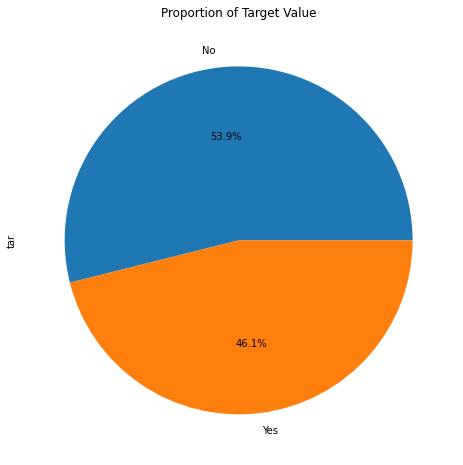

In [ ]:
figure(figsize=(8, 8))
df_diab2.tar.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

# Feature Engineering


In feature engineering, we will create features that will be important for our model.
We will be handling numerical values as well as categorical values and will check if there is any column that has ranges and will be changed accordingly.


In the data set we have "?" entries as missing values that needs to be handled , so we will replace it with NaN

In [ ]:
df_diab=df_diab.replace('?',"0") 
df_diab.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,objective
0,Caucasian,Female,[0-10),0,6,25,1,1,0,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),0,1,1,7,3,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),0,1,1,7,2,0,0,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),0,1,1,7,2,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),0,1,1,7,1,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0


We will check the percentage of missing/null values in the dataset so that it can be handled in the proper way. 

In [ ]:
def nullData(df):
    null_data = df.isnull().sum()
    per_null_data = (df.isnull().sum()/df.isnull().count()*100)
    temp = pd.concat([null_data, per_null_data], axis=1, keys=['Total', \
                                                             'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    temp['Types'] = types
    return temp    

nullData(df_diab)['Percent'].sort_values(ascending=False)

race                        0.0
miglitol                    0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglitazone               0.0
acarbose                    0.0
troglitazone                0.0
gender                      0.0
tolazamide                  0.0
insulin                     0.0
glyburide-metformin         0.0
glipizide-metformin         0.0
glimepiride-pioglitazone    0.0
metformin-rosiglitazone     0.0
metformin-pioglitazone      0.0
change                      0.0
diabetesMed                 0.0
nateglinide                 0.0
repaglinide                 0.0
metformin                   0.0
A1Cresult                   0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_

Since Weight, medical speciality, prayer_code, race, diag_3, diag_2 and diag_3 have some missing vlaues according to the percentage therefore we need to clean these.

In [ ]:
df_diab['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [ ]:
df_diab=df_diab[df_diab['gender']!='Unknown/Invalid']
#df_diab['gender'].value_counts()

## Numerical Columns

In [ ]:
numerical_col = ['time_in_hospital','num_lab_procedures', \
                 'num_procedures', 'num_medications','number_outpatient', \
                 'number_emergency', 'number_inpatient','number_diagnoses']

In [ ]:
df_diab[numerical_col].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

## Categorical Features

We chose the First 10 medical speciality as remaining are few as compared to others so except the first 10 we mentioned everyother is falls under others

In [ ]:
imp_ten=['Unknown','InternalMedicine',
        'Emergency/Trauma','Family/GeneralPractice','Cardiology',
        'Surgery-General','Nephrology','Orthopedics',
        'Orthopedics-Reconstructive','Radiologist']

df_diab.loc[~df_diab['medical_specialty'].isin(imp_ten),
            'medical_specialty']='Other'

In [ ]:
df_diab['medical_specialty'].isnull().sum()
df_diab['medical_specialty']=df_diab['medical_specialty'].fillna('Unknown') 

print(df_diab['medical_specialty'].value_counts())



Other                         58287
InternalMedicine              14635
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5351
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Radiologist                    1140
Name: medical_specialty, dtype: int64


In [ ]:
#changing payer_code column and replacing NaN with unknown
print(df_diab['payer_code'].isnull().sum())
print(df_diab['payer_code'].value_counts())
df_diab['payer_code'] = df_diab['payer_code'].fillna('Unknown') 

#changing Race column and replacing NaN with unknown
df_diab['race'].isnull().sum()
df_diab['race'].value_counts()
df_diab['race']=df_diab['race'].fillna('Unknown')

0
0     40255
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2531
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


In [ ]:
category_col = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code']

In [ ]:
num_cat_col = ['admission_type_id', 'discharge_disposition_id',\
                'admission_source_id']

df_diab[num_cat_col] = df_diab[num_cat_col].astype('str')

In [ ]:
df_cat_col = pd.get_dummies(df_diab[category_col + num_cat_col +\
                                    ['medical_specialty']]\
                        ,drop_first = True)

In [ ]:
df_cat_col.head()


,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,...,admission_source_id_9,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Other,medical_specialty_Radiologist,medical_specialty_Surgery-General
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_cat_col=df_cat_col.astype('int')


In [ ]:
df_diab = pd.concat([df_diab,df_cat_col], axis = 1)

In [ ]:
all_category_col = list(df_cat_col.columns)


## Adding Columns

In [ ]:
#df_diab['weight']
df_diab['weight'].value_counts()


0            98566
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [ ]:
def check_label2(x):
  if x == '0':
    return '0'
  elif x == '[0-25)':
    return '0'
  elif x == '[25-50)':
    return '25'
  elif x == '[50-75)':
    return '50'  
  elif x == '[75-100)':
     return '75' 
  elif x == '[100-125)':
    return '100'
  elif x == '[125-150)':
    return '125'
  elif x == '[150-175)':
    return '150'
  elif x == '[175-200)':
    return '175'
  elif x == '>200':
    return '200'



In [ ]:
df_diab['has_weight'] =df_diab['weight'].apply(lambda x: check_label2(x))

In [ ]:
df_diab['has_weight']=df_diab['has_weight'].astype('int')

In [ ]:
#weigh_cat = {"has_weight":     {"0" : 0,
 #                           "[0-25)": 0,
  #                         "[25-50)": 25,
   #                        "[50-75)": 50,
    #                       "[75-100)": 75,
     #                      "[100-125)": 100,
      #                     "[125-150)": 125,
       #                    "[150-175)": 150,
        #                   "[175-200)": 175,
         #                  ">200": 200}}

In [ ]:
print(df_diab['age'].value_counts())

age_cat = {"age":     {"[0-10)": 0,
                           "[10-20)": 10,
                           "[20-30)": 20,
                           "[30-40)": 30,
                           "[40-50)": 40,
                           "[50-60)": 50,
                           "[60-70)": 60,
                           "[70-80)": 70,
                           "[80-90)": 80,
                           "[90-100)": 90}}



df_diab['age_group']=df_diab.replace(age_cat, inplace=True)

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [ ]:
df_diab

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Other,medical_specialty_Radiologist,medical_specialty_Surgery-General,has_weight,age_group
0,Caucasian,Female,0,0,6,25,1,1,0,Other,...,0,0,0,0,0,1,0,0,0,None
1,Caucasian,Female,10,0,1,1,7,3,0,Other,...,0,0,0,0,0,1,0,0,0,None
2,AfricanAmerican,Female,20,0,1,1,7,2,0,Other,...,0,0,0,0,0,1,0,0,0,None
3,Caucasian,Male,30,0,1,1,7,2,0,Other,...,0,0,0,0,0,1,0,0,0,None
4,Caucasian,Male,40,0,1,1,7,1,0,Other,...,0,0,0,0,0,1,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,70,0,1,3,7,3,MC,Other,...,0,0,0,0,0,1,0,0,0,None
101762,AfricanAmerican,Female,80,0,1,4,5,5,MC,Other,...,0,0,0,0,0,1,0,0,0,None
101763,Caucasian,Male,70,0,1,1,7,1,MC,Other,...,0,0,0,0,0,1,0,0,0,None
101764,Caucasian,Female,80,0,2,3,7,10,MC,Surgery-General,...,0,0,0,0,0,0,0,1,0,None


In [ ]:
col_added = ['age','has_weight']

In [ ]:
print('Total number of features:', len(numerical_col + all_category_col + col_added))
print('Numerical Features:',len(numerical_col))
print('Categorical Features:',len(all_category_col))
print('Extra features:',len(col_added))

Total number of features: 146
Numerical Features: 8
Categorical Features: 136
Extra features: 2


In [ ]:
df_diab[numerical_col + all_category_col + col_added].isnull().sum().sort_values(ascending = True).head(10)

time_in_hospital               0
admission_type_id_8            0
discharge_disposition_id_10    0
discharge_disposition_id_11    0
discharge_disposition_id_12    0
discharge_disposition_id_13    0
discharge_disposition_id_14    0
admission_type_id_7            0
discharge_disposition_id_15    0
discharge_disposition_id_17    0
dtype: int64

In [ ]:
imp_col = numerical_col + all_category_col + col_added

df_final = df_diab[imp_col + ['objective']]
df_final

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Other,medical_specialty_Radiologist,medical_specialty_Surgery-General,age,has_weight,objective
0,1,41,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,59,0,18,0,0,0,9,0,0,...,0,0,0,0,1,0,0,10,0,1
2,2,11,5,13,2,0,1,6,1,0,...,0,0,0,0,1,0,0,20,0,0
3,2,44,1,16,0,0,0,7,0,0,...,0,0,0,0,1,0,0,30,0,0
4,1,51,0,8,0,0,0,5,0,0,...,0,0,0,0,1,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,1,0,...,0,0,0,0,1,0,0,70,0,1
101762,5,33,3,18,0,0,1,9,1,0,...,0,0,0,0,1,0,0,80,0,0
101763,1,53,0,9,1,0,0,13,0,0,...,0,0,0,0,1,0,0,70,0,0
101764,10,45,2,21,0,0,1,9,0,0,...,0,0,0,0,0,0,1,80,0,0


In [ ]:
def outliers(df_column):
    q75, q25 = np.percentile(df_column, [75 ,25]) 
    iqr = q75 - q25
    print('q75: ',q75)
    print('q25: ',q25)
    print('Inter Quartile Range: ',iqr)
    print('Outliers lie before', q25-2*iqr, 'and beyond', q75+1.8*iqr) 

# Usually 1.5 times IQR is considered, but we have used 1.8 for broader range

    print('Number of Rows with Left Extreme Outliers:', 
          len(df_final[df_column <q25-1.8*iqr]))
    print('Number of Rows with Right Extreme Outliers:', 
          len(df_final[df_column>q75+1.8*iqr]))
    plt.tight_layout()
    plt.style.use('seaborn')
    sns.set_context('notebook')
    sns.histplot(data=df_final, x=df_column, hue="objective",multiple="stack",
                 kde=True)#,palette= oe
    plt.show()

q75:  6.0
q25:  2.0
Inter Quartile Range:  4.0
Outliers lie before -6.0 and beyond 13.2
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 1042


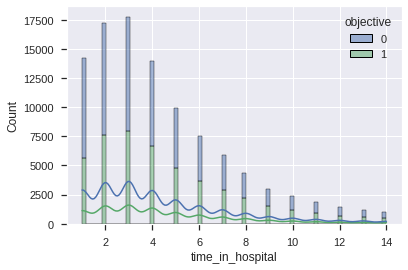

q75:  57.0
q25:  31.0
Inter Quartile Range:  26.0
Outliers lie before -21.0 and beyond 103.80000000000001
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 37


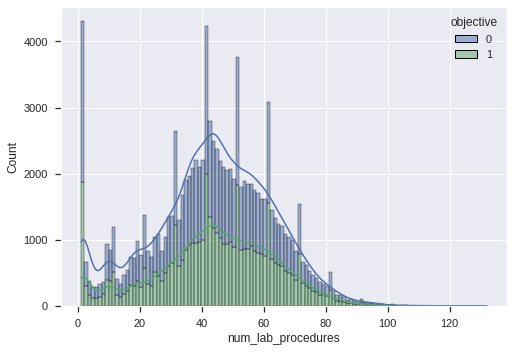

q75:  2.0
q25:  0.0
Inter Quartile Range:  2.0
Outliers lie before -4.0 and beyond 5.6
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 4954


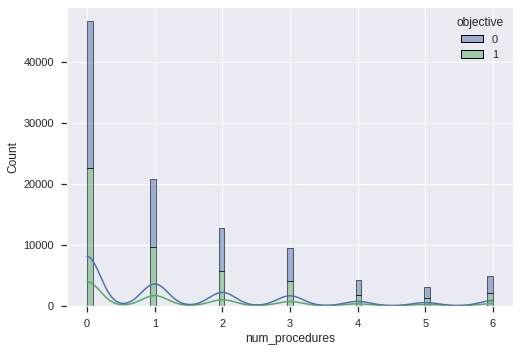

q75:  20.0
q25:  10.0
Inter Quartile Range:  10.0
Outliers lie before -10.0 and beyond 38.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 1749


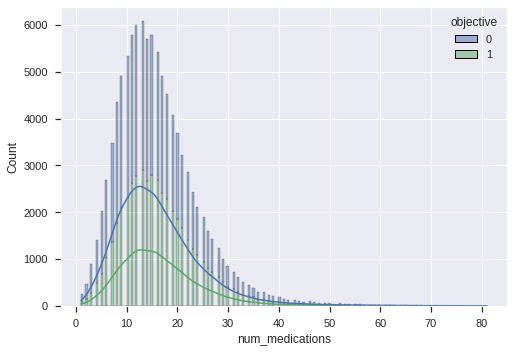

q75:  0.0
q25:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 16739


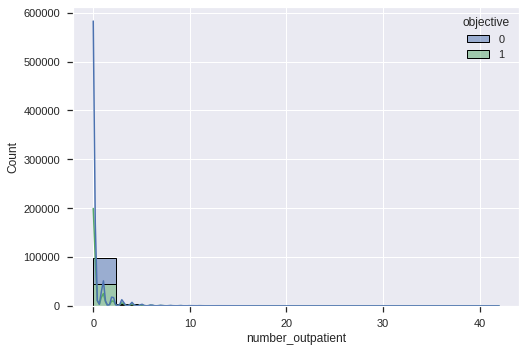

q75:  0.0
q25:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 11383


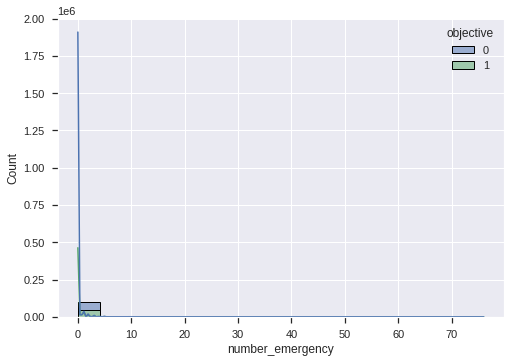

q75:  1.0
q25:  0.0
Inter Quartile Range:  1.0
Outliers lie before -2.0 and beyond 2.8
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 7049


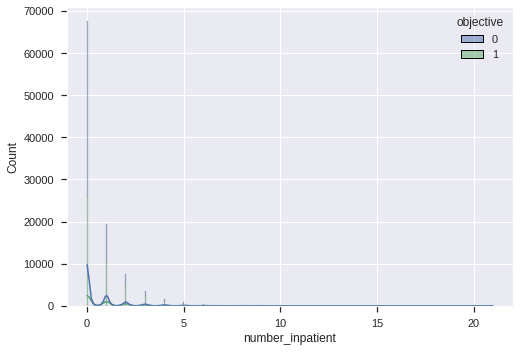

q75:  9.0
q25:  6.0
Inter Quartile Range:  3.0
Outliers lie before 0.0 and beyond 14.4
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 55


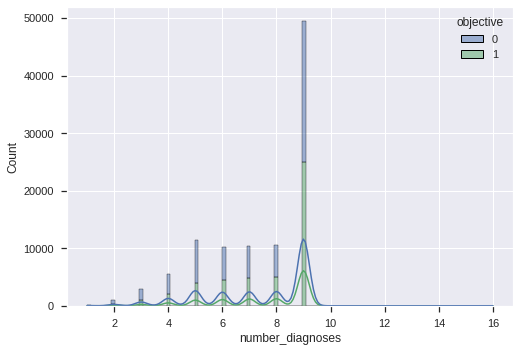

q75:  70.0
q25:  50.0
Inter Quartile Range:  20.0
Outliers lie before 10.0 and beyond 106.0
Number of Rows with Left Extreme Outliers: 852
Number of Rows with Right Extreme Outliers: 0


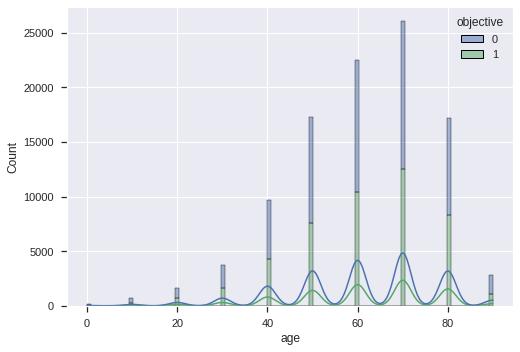

q75:  0.0
q25:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 3149


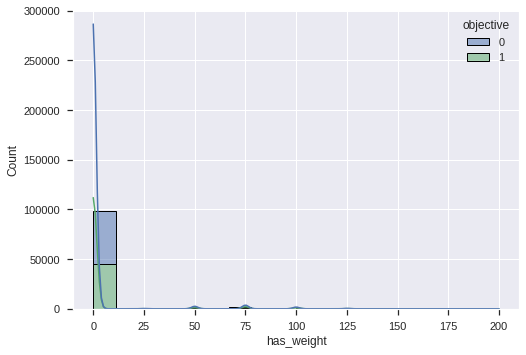

In [ ]:
outliers(df_final['time_in_hospital'])
outliers(df_final['num_lab_procedures'])
outliers(df_final['num_procedures'])
outliers(df_final['num_medications'])
outliers(df_final['number_outpatient'])
outliers(df_final['number_emergency'])
outliers(df_final['number_inpatient'])
outliers(df_final['number_diagnoses'])
outliers(df_final['age'])
outliers(df_final['has_weight'])


In [ ]:
df_final.drop(df_final[(df_final['time_in_hospital'] > 13.2) &\
                       (df_final['objective'] == 0)].index, inplace=True)

df_final.drop(df_final[(df_final['num_lab_procedures'] > 103) &\
                       (df_final['objective'] == 0)].index, inplace=True)

df_final.drop(df_final[(df_final['num_procedures'] > 5.6) & \
                       (df_final['objective'] == 0)].index,inplace=True)

df_final.drop(df_final[(df_final['num_medications'] > 38) & \
                       (df_final['objective'] == 0)].index,inplace=True)

df_final.drop(df_final[(df_final['number_inpatient'] > 2.8) & \
                       (df_final['objective'] == 0)].index,inplace=True)

df_final.drop(df_final[(df_final['number_diagnoses'] > 14.4) & \
                       (df_final['objective'] == 0)].index,inplace=True)

df_final.drop(df_final[(df_final['age'] < 10) &(df_final['age'] > 106)& \
                       (df_final['objective'] == 0)].index,inplace=True)


# PCA

In [ ]:
def PCA(X , num_components):
  
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index][0:num_components]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced, sorted_eigenvalue

In [ ]:
df_final2=df_final[['time_in_hospital','num_lab_procedures', \
                 'num_procedures', 'num_medications',\
             'number_outpatient', 'number_emergency', \
             'number_inpatient','number_diagnoses','age'\
             ,'has_weight','objective']]

In [ ]:
#df_final2

In [ ]:
X_PCA, lambdas = PCA(df_final2.values[:, 0:-1],9)

In [ ]:
for i in lambdas:
    print(i/lambdas.sum())

0.43316596091039766
0.2852328149804623
0.20743024864949058
0.058210171360038
0.0066680183514200055
0.0036141256235728628
0.0023007140450128976
0.0018505121024869427
0.0015274339771187602


# Model Implementation


## Logistic Regression

In [ ]:
class LogisticRegression:
    def __init__(self, X, y, maxIteration,learningRate,tolerance):
        self.X = X
        self.y = y
        self.maxIteration = maxIteration
        self.learningRate = learningRate
        self.tolerance = tolerance
        #self.batch_size = batch_size

    def split(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X,self.y,test_size=0.25,random_state=42)
        sm = SMOTEENN(random_state=0)
        X_train, y_train = sm.fit_resample(X_train, y_train)
        return X_train, X_test, y_train, y_test

    def addX0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])

    def normalize(self,X):
        mean = np.mean(X,0)
        std = np.std(X,0)
        X_norm = (X-mean)/std
        X_norm = self.addX0(X_norm)
        return X_norm, mean, std

    def normaliseTestData(self, X, mean, std):
        X_norm = (X - mean)/std
        X_norm = self.addX0(X_norm)
        return X_norm

    def sigmoidFunc(self, theta):
        sigmoid_func = 1 / (1 + np.exp(-theta))
        return sigmoid_func

    def costFunction(self, X, y):
        sigmoid_func = self.sigmoidFunc(X.dot(self.theta))
        predicted = y * np.log(sigmoid_func) +\
         (1 - y) * np.log(1 - sigmoid_func)
        model_cost = predicted.sum()
        return model_cost
    
    def gradient(self, X, y):
        sigmoid_func = self.sigmoidFunc(X.dot(self.theta))
        gradient_log = (sigmoid_func - y).dot(X)
        return gradient_log

    def gradientDescent(self, X, y):
        Sequence_cost = []
        lastCost = float('inf')

        for i in tqdm(range(self.maxIteration)):
            self.theta = self.theta - self.learningRate * self.gradient(X, y)
            currentCost = self.costFunction(X, y)
            diffError = lastCost - currentCost
            lastCost = currentCost
            Sequence_cost.append(abs(currentCost))
            #if diffError < self.tolerance:
             # print("Model has stopped learning")
              #break 
        return
    
    

    def predict(self, X):
        sigmoid_func = self.sigmoidFunc(X.dot(self.theta))
        return np.around(sigmoid_func)

    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        Accuracy = (y == y_hat).sum() / y.size
        Precision = (y & y_hat).sum() / y_hat.sum()
        Recall = (y & y_hat).sum() / y.sum()
        f_score = 2*(Precision * Recall )/(Precision + Recall)
        return Accuracy, Recall, Precision, f_score
        
    

    def fit(self):
        #self.X_train, self.X_test,self.y_train,self.y_test=\
        #train_test_split(self.X,self.y,test_size=0.3,random_state=42)
        self.X_train, self.X_test, self.y_train, self.y_test = self.split()
        self.X_train, self.mean, self.std = self.normalize(self.X_train)
        self.X_test = self.normaliseTestData(self.X_test,self.mean,self.std)
        print('X_train dimension= ', self.X_train.shape)
        print('X_test dimension= ', self.X_test.shape)
        print('y_train dimension= ', self.y_train.shape)
        print('y_test dimension= ', self.y_test.shape)
        print('X_train type= ', type(self.X_train))
        print('X_test type= ', type(self.X_test))
        print('y_train type= ', type(self.y_train))
        print('y_test type= ', type(self.y_test))
        
        self.theta = np.ones(self.X_train.shape[1], dtype=np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        #print(self.w)

        y_hat_train = self.predict(self.X_train)
        Accuracy, Recall, Precision, f_score = self.evaluate(self.y_train,\
                                                             y_hat_train)

        print('\nModel Accuracy when trained ', Accuracy)
        print('Model Recall score when trained', Recall)
        print('Model Precision score when trained ', Precision)
        print('Model f_score when trained ', f_score)

        
        

In [ ]:
lrModel = LogisticRegression(df_final2.values[:, 0:-1],df_final2['objective'],\
                        maxIteration=5000,tolerance=0.00001,learningRate=0.001)

lrModel.fit()

X_train dimension=  (15482, 11)
X_test dimension=  (24028, 11)
y_train dimension=  (15482,)
y_test dimension=  (24028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'pandas.core.series.Series'>
y_test type=  <class 'pandas.core.series.Series'>


100%|██████████| 5000/5000 [00:27<00:00, 181.58it/s]


Model Accuracy when trained  0.7881410670456014
Model Recall score when trained 0.6339297910121569
Model Precision score when trained  0.8855180309101317
Model f_score when trained  0.7388950804012101


In [ ]:
lrModel = LogisticRegression(df_final2.values[:, 0:-1],df_final['objective'],\
                        maxIteration=5000,tolerance=0.001,learningRate=0.01)

lrModel.fit()

X_train dimension=  (15482, 11)
X_test dimension=  (24028, 11)
y_train dimension=  (15482,)
y_test dimension=  (24028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'pandas.core.series.Series'>
y_test type=  <class 'pandas.core.series.Series'>


100%|██████████| 5000/5000 [00:38<00:00, 131.45it/s]



Model Accuracy when trained  0.7343366490117555
Model Recall score when trained 0.8649091654145609
Model Precision score when trained  0.6696277495769881
Model f_score when trained  0.7548429397389284


In [ ]:
lrModel = LogisticRegression(df_final2.values[:, 0:-1],df_final['objective'],\
                        maxIteration=5000,tolerance=0.01,learningRate=0.1)

lrModel.fit()

X_train dimension=  (15482, 11)
X_test dimension=  (24028, 11)
y_train dimension=  (15482,)
y_test dimension=  (24028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'pandas.core.series.Series'>
y_test type=  <class 'pandas.core.series.Series'>


100%|██████████| 5000/5000 [00:26<00:00, 185.96it/s]


Model Accuracy when trained  0.7294277225164707
Model Recall score when trained 0.8711924600464418
Model Precision score when trained  0.662718204488778
Model f_score when trained  0.7527884331661258


In [ ]:
lrModel = LogisticRegression(df_final2.values[:, 0:-1],df_final['objective'],\
                        maxIteration=5000,tolerance=0.0001,learningRate=0.0001)

lrModel.fit()

X_train dimension=  (15482, 11)
X_test dimension=  (24028, 11)
y_train dimension=  (15482,)
y_test dimension=  (24028,)
X_train type=  <class 'numpy.ndarray'>
X_test type=  <class 'numpy.ndarray'>
y_train type=  <class 'pandas.core.series.Series'>
y_test type=  <class 'pandas.core.series.Series'>


100%|██████████| 5000/5000 [00:26<00:00, 187.81it/s]


Model Accuracy when trained  0.7978943288980752
Model Recall score when trained 0.7236716295588035
Model Precision score when trained  0.8272954403497814
Model f_score when trained  0.7720218579234972


## Naive Bayes

In [ ]:
class NaiveBayes:
    def __init__(self,X,y,batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size

    def splitData(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                           test_size = 0.25,
                                                           random_state = 1)
        sm = SMOTEENN(random_state=0)
        X_train, y_train = sm.fit_resample(X_train, y_train)
        return X_train, X_test, y_train, y_test
        
    def fitModel(self):
        self.X_train, self.X_test,self.y_train,self.y_test=\
        train_test_split(self.X,self.y,test_size = \
                         self.batch_size,random_state=42)
        
        self.classes = len(np.unique(self.y_train))
        self.Samples, self.dimensions = self.X_train.shape

        self.mean = np.ones((self.classes, self.dimensions)) * 0
        self.variance = np.ones((self.classes, self.dimensions)) * 0
        self.priors = np.ones(self.classes) * 0

        for c in range(self.classes):
            X_train_c = self.X_train[self.y_train == c]
            self.mean[c, :] = np.mean(X_train_c, axis=0)
            self.variance[c, :] = np.var(X_train_c, axis=0)
            self.priors[c] = X_train_c.shape[0] / self.Samples
        
        #predict values on testing data
        self.predict(self.X_test)

    def predict(self,X):
        y_hat = [self.calculate_posteriors(x) for x in X]
        self.evaluatePerformance(y_hat)

    def calculate_posteriors(self, x):
        posteriors = []

        for c in range(self.classes):
            class_mean = self.mean[c]
            class_variance = self.variance[c]
            prior = np.log(self.priors[c])

            posterior = np.sum(np.log(self.gaussianDensity(x, \
                                                           class_mean, \
                                                           class_variance)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return np.argmax(posteriors)


    def gaussianDensity(self, x, mean, var):
        const = 1 / np.sqrt(var * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / var))
        return const * proba
    
    def evaluatePerformance(self,y_hat):
        accuracy = np.sum(self.y_test==y_hat) / len(self.y_test)

       #Confusion matrix
        cm_nb = confusion_matrix(self.y_test,y_hat)

        plt.matshow(cm_nb,cmap='viridis')
        plt.title('Confusion Matrix for Naive Bayes',fontsize=15)
        plt.xlabel('Predicted Label',color = 'white')
        plt.ylabel('True Label',color = 'white')
        plt.gcf().set_size_inches(10,6)
        plt.show()
        
        TP = np.diag(cm_nb)
        FP = np.sum(cm_nb, axis=0) - TP
        FN = np.sum(cm_nb, axis=1) - TP
        num_classes = 2
        TN = []
        for i in range(num_classes):
            temp = np.delete(cm_nb, i, 0)    # delete ith row
            temp = np.delete(temp, i, 1)  # delete ith column
            TN.append(sum(sum(temp)))
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        print('Performance metrics:')
        print('Accuracy of the model ',accuracy)
        print('Precision of the model ',precision)
        print('Recall of the model ', recall)

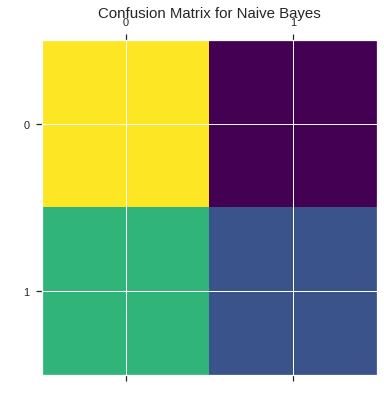

Performance metrics:
Accuracy of the model  0.617573613567787
Precision of the model  [0.58714238 0.72108999]
Recall of the model  [0.87746479 0.33925878]


In [ ]:
NB = NaiveBayes(df_final2.values[:, 0:-1], df_final2['objective'],batch_size=0.2)
NB.fitModel()

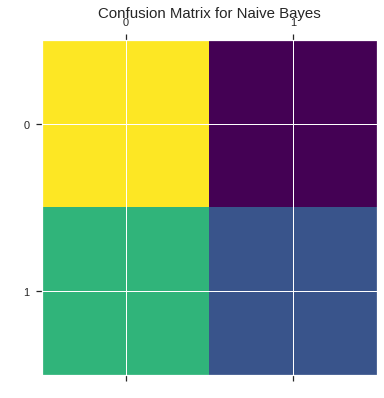

Performance metrics:
Accuracy of the model  0.6183619111037123
Precision of the model  [0.58710164 0.72487161]
Recall of the model  [0.87909076 0.34004474]


In [ ]:
NB = NaiveBayes(df_final2.values[:, 0:-1], df_final2['objective'],batch_size=0.25)
NB.fitModel()

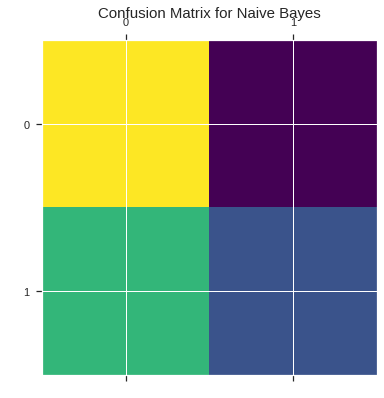

Performance metrics:
Accuracy of the model  0.616030243124198
Precision of the model  [0.58535709 0.72025625]
Recall of the model  [0.87669759 0.33827638]


In [ ]:
NB = NaiveBayes(df_final2.values[:, 0:-1], df_final2['objective'],batch_size=0.3)
NB.fitModel()

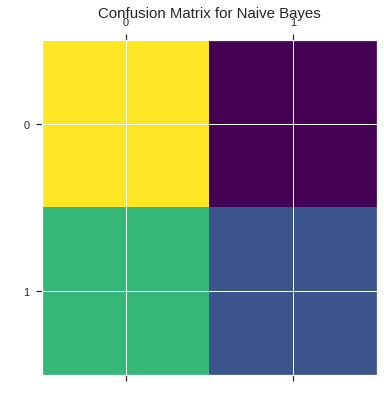

Performance metrics:
Accuracy of the model  0.6156247213056274
Precision of the model  [0.58411989 0.72207758]
Recall of the model  [0.87656819 0.33943214]


In [ ]:
NB = NaiveBayes(df_final2.values[:, 0:-1], df_final2['objective'],batch_size=0.35)
NB.fitModel()

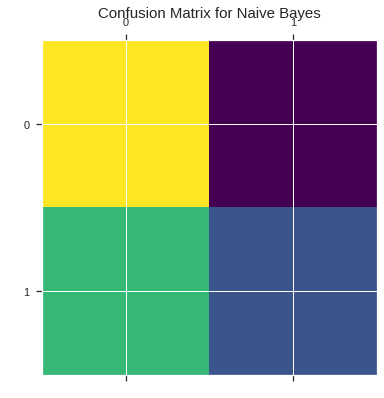

Performance metrics:
Accuracy of the model  0.6156227239621267
Precision of the model  [0.58318185 0.72590982]
Recall of the model  [0.87854354 0.33874499]


In [ ]:
NB = NaiveBayes(df_final2.values[:, 0:-1], df_final2['objective'],batch_size=0.40)
NB.fitModel()

## Neural Networks

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final2.values[:, 0:-1],\
                                df_final2['objective'],test_size=0.25,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,\
                                                  test_size=0.15,random_state=0)
sm = SMOTEENN(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
weights = {0:1, 1:1.3}
nnModel = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,\
                       kernel_initializer='he_uniform'),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),])

nnModel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=nnModel.fit(X_train, y_train, validation_data = [X_val,y_val], epochs=125, batch_size=256,class_weight = weights)

loss, accuracy = nnModel.evaluate(X_test, y_test)
print('Test accuracy of the model', accuracy)

Epoch 1/125
52/52 [==============================] - 2s 14ms/step - loss: 0.7965 - accuracy: 0.6385 - val_loss: 0.7549 - val_accuracy: 0.5483
Epoch 2/125
52/52 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.6801 - val_loss: 0.7141 - val_accuracy: 0.5737
Epoch 3/125
52/52 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.7191 - val_loss: 0.6952 - val_accuracy: 0.6016
Epoch 4/125
52/52 [==============================] - 0s 6ms/step - loss: 0.5781 - accuracy: 0.7334 - val_loss: 0.6908 - val_accuracy: 0.5945
Epoch 5/125
52/52 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7430 - val_loss: 0.6999 - val_accuracy: 0.6074
Epoch 6/125
52/52 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.7632 - val_loss: 0.6924 - val_accuracy: 0.6163
Epoch 7/125
52/52 [==============================] - 0s 5ms/step - loss: 0.5310 - accuracy: 0.7658 - val_loss: 0.7042 - val_accuracy: 0.6029
Epoch 8/125


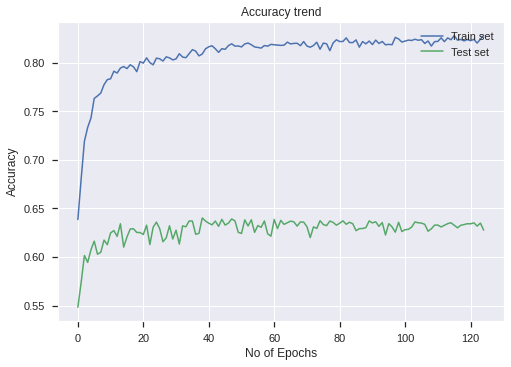

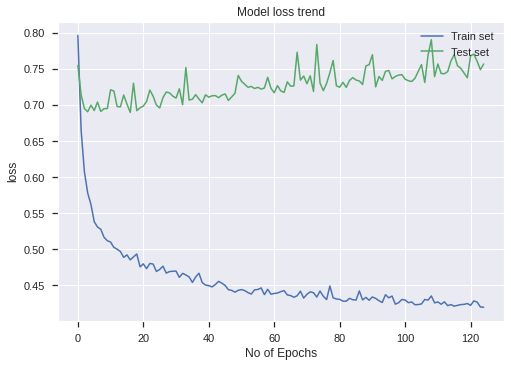

In [ ]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy trend')
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['Train set', 'Test set'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss trend')
plt.ylabel('loss')
plt.xlabel('No of Epochs')
plt.legend(['Train set', 'Test set'], loc='upper right')
plt.show()

In [ ]:
y_pred=nnModel.predict(X_test)
y_pred =(y_pred>0.9)
y_pred = np.concatenate(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Total Mistakes in the prediction ',cm[0][1]+cm[1][0])
result = pd.DataFrame(data=np.column_stack((y_test,y_pred)),columns=['Actual','Prediction'])
TN = len(result[(result.Actual==0) & (result.Prediction==0)])
TP = len(result[(result.Actual==1) & (result.Prediction==1)])
FP = len(result[(result.Actual==0) & (result.Prediction==1)])
FN = len(result[(result.Actual==1) & (result.Prediction==0)])
Total = len(result)
print('Accuracy of the model ', (TP + TN) / Total)
print('Recall of the model ', (TP / (TP + FN)))
print('Precision of the model', (TP / (TP + FP)))


751/751 [==============================] - 3s 3ms/step
[[11462   760]
 [ 8694  3112]]
Total Mistakes in the prediction  9454
Accuracy of the model  0.6065423672382221
Recall of the model  0.26359478231407757
Precision of the model 0.8037190082644629


In [ ]:
nnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


# ***END CODE!!!***